In [1]:
import pandas as pd

In [2]:
file_name = '../Random-Trials/Phy-para/para-1969.txt'

In [3]:
m_m = 30
m_T = (2021-1969) * 365

In [4]:
with open(file_name) as file:
    lines = [line.split() for line in file]

In [5]:
n = int(lines[0][0])
n

36802

In [6]:
Alpha = float(lines[1][0])
Beta = float(lines[2][0])
Alpha, Beta, m_T, m_m

(1.33703, 0.8565, 18980, 30)

In [7]:
from tqdm import tqdm

Paper_Citations_Dict = {}
Paper_Param_Dict = {}
PaperNode_List = []
for line in tqdm(lines[3:]):
    paper = int(line[0])
    PaperNode_List.append(paper)
    year = int(line[1])
    mu = float(line[2])
    sigma = float(line[3])
    Paper_Param_Dict[paper] = [mu, sigma]
    
    cite_len = int(line[4])
    citations = []
    if cite_len > 0:
        citations = [int(each) for each in line[5:]]
    assert(len(citations) == cite_len)
    Paper_Citations_Dict[paper] = citations
    
#     break
    

100%|██████████| 36802/36802 [00:00<00:00, 43542.12it/s]


In [8]:
len(PaperNode_List), Paper_Param_Dict[218407], len(Paper_Citations_Dict[218407])

(36802, [7.27257, 0.677682], 18)

In [9]:
from scipy.stats import norm
import numpy as np
norm.cdf(0), np.log(np.e)

(0.5, 1.0)

In [10]:
np.sum(norm.cdf([0,1.645]))

1.4500150944608787

In [11]:
a_test = np.array([1,2,3])
a_test[a_test < 3]

array([1, 2])

In [12]:
def Phi(t, mu, sigma):
    return norm.cdf((np.log(t) - mu) / sigma)
Phi(np.e**20,20,1)

0.5

In [13]:
def CalculateX(cite_a, mu, sigma, n_d):
    cur_T = cite_a[-1]
    return (m_m + n_d) * Phi(cur_T, mu, sigma) - np.sum(Phi(cite_a, mu, sigma))

In [14]:
def CalculateA(c_t, n_d):
    return np.log((c_t+m_m) / (m_m + n_d)) / (Alpha + n_d)

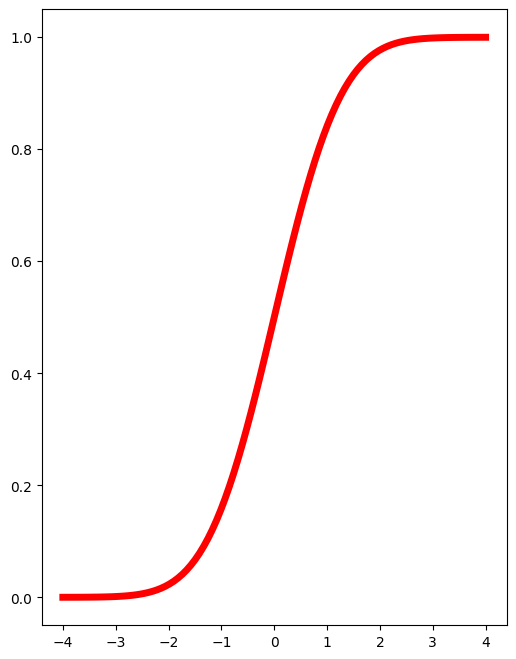

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize = (6,8))
x = np.linspace(-4,4,100)
ax1.plot(x, norm.cdf(x), 'r', linewidth=5)

In [16]:
import random
randomlist = random.sample(range(12024), 10)
randomlist

[6041, 11319, 2334, 4017, 5992, 6100, 263, 5776, 4420, 11037]

In [17]:
n

36802

In [18]:
random.seed(10)
random_list = random.sample(range(n), 10000)
random_set = set(random_list)

In [19]:
len(random_set)

10000

In [20]:
random_list[:5]

[2135, 28107, 31625, 972, 13506]

In [21]:
18723 in random_set

False

## c30 >= 30

100%|██████████| 36802/36802 [00:53<00:00, 684.79it/s] 


16342 0


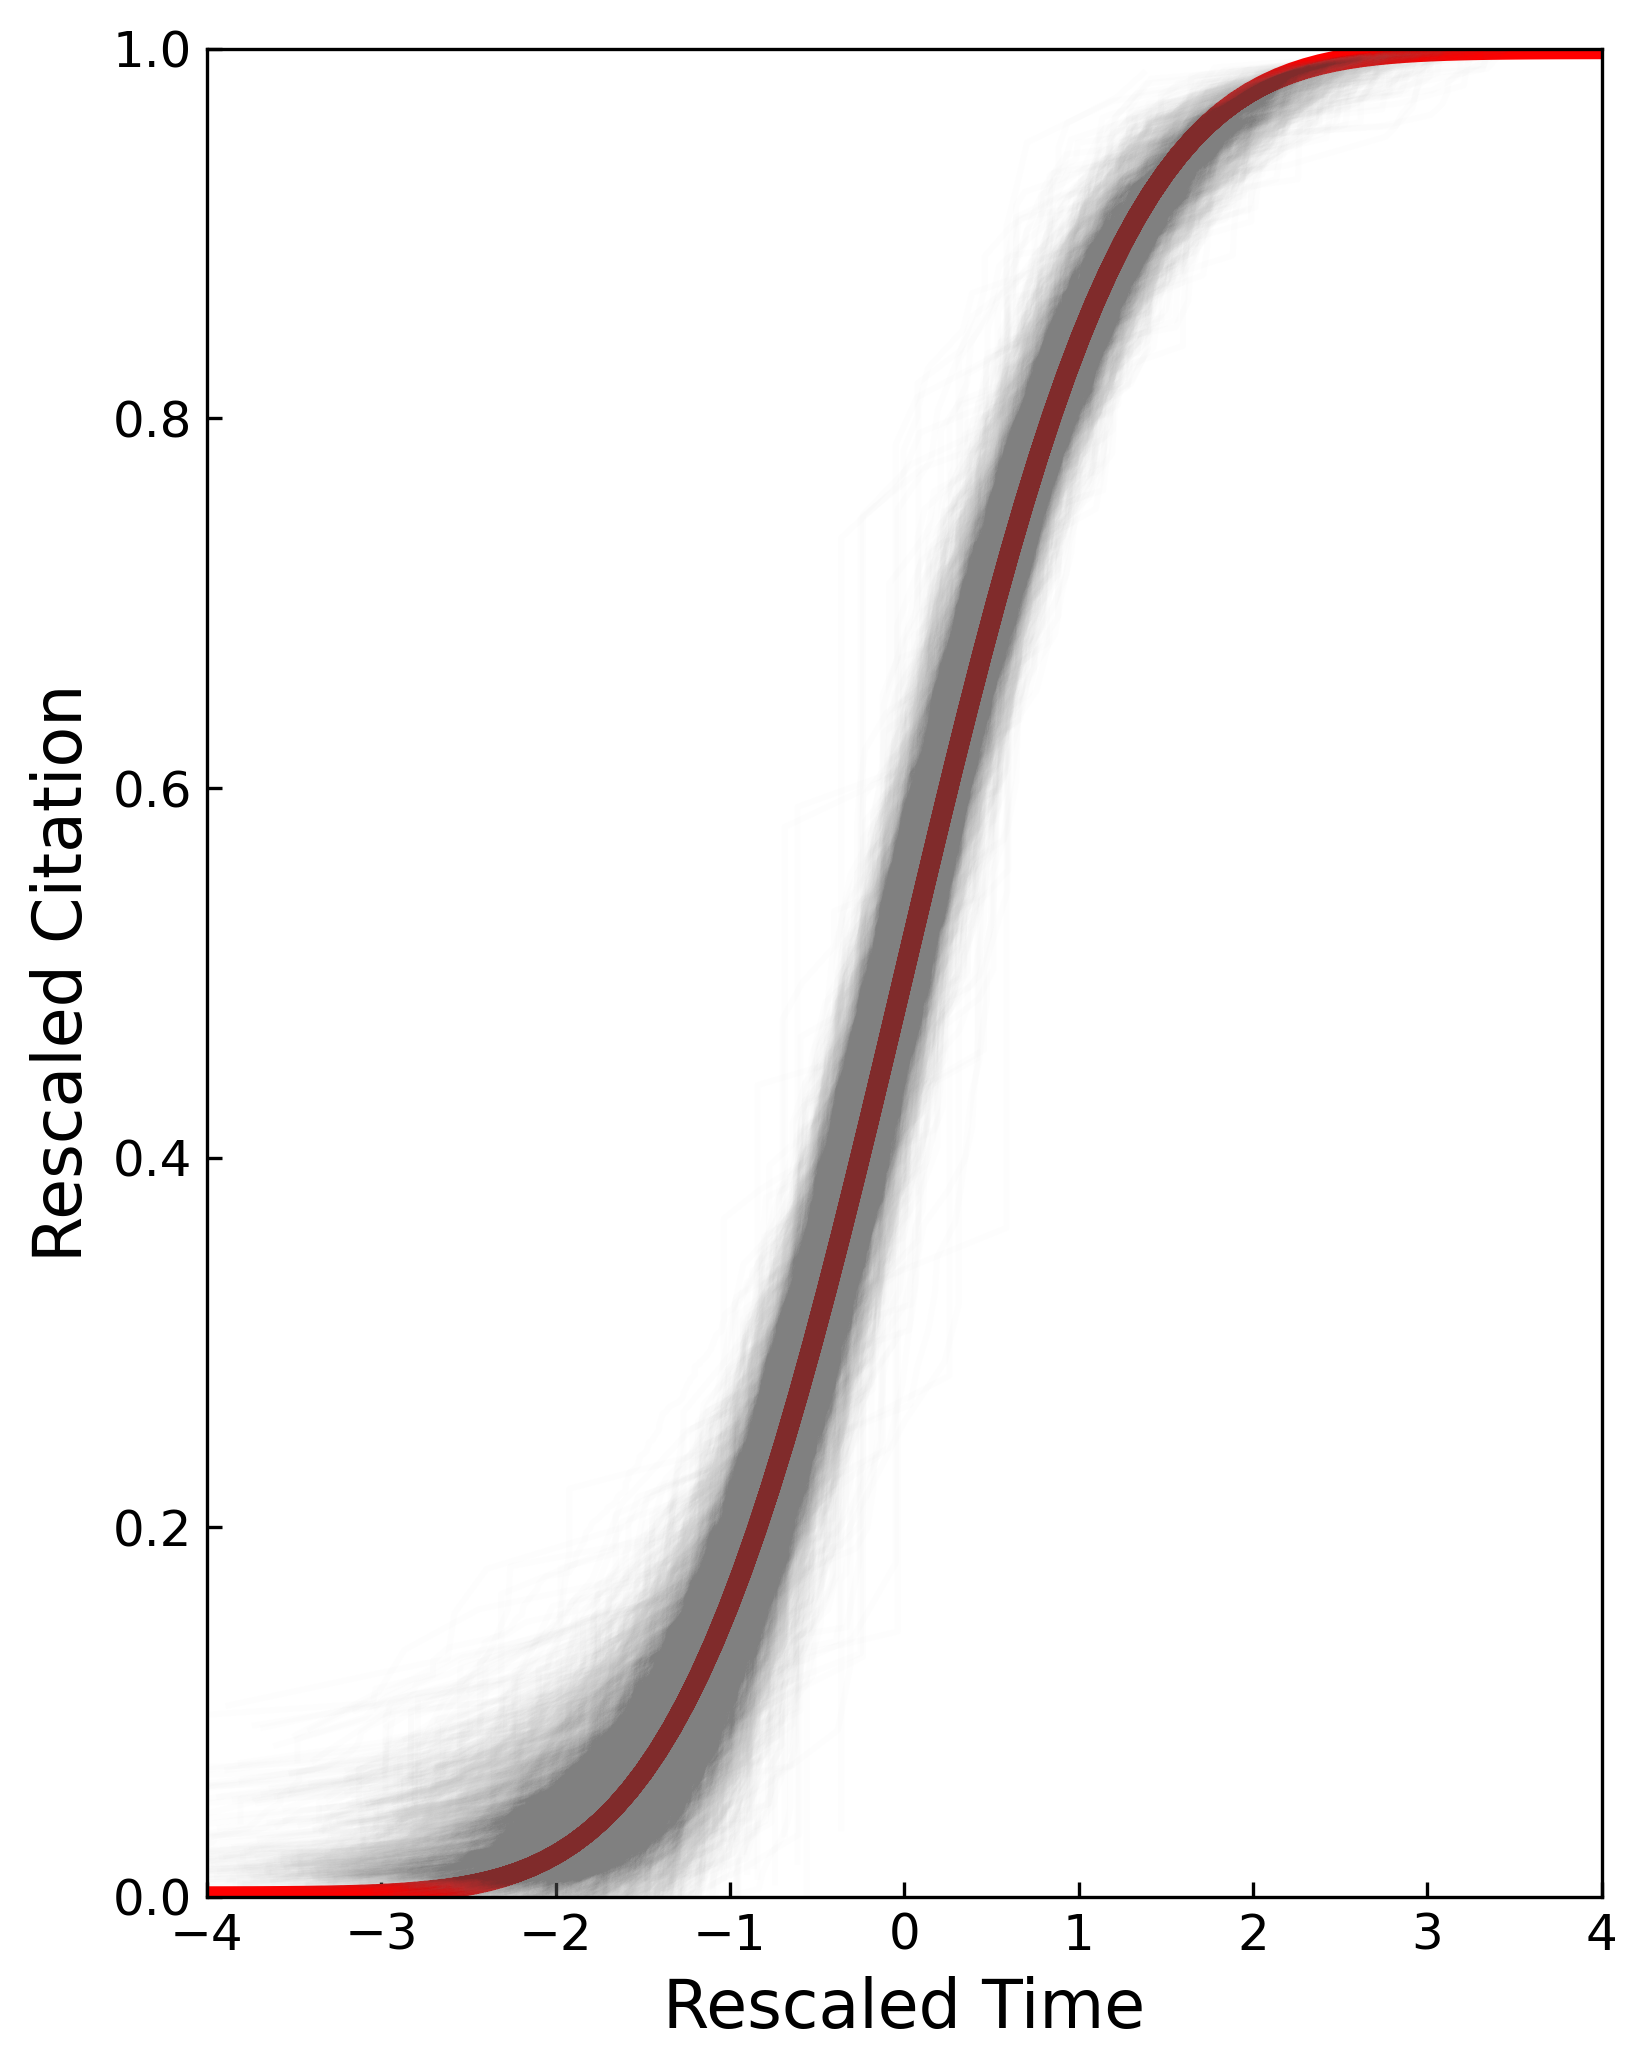

In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize = (6,8), dpi=300)

x = np.linspace(-4,4,100)
ax1.plot(x, norm.cdf(x), 'r', linewidth=5)

cnt = 0
cur = 0
for paper in tqdm(PaperNode_List):
    cite_a = np.array([Paper_Citations_Dict[paper]])
    cite_a = cite_a[cite_a < m_T]
    n_d = len(cite_a)
#     if n_d < 15:
#         continue
    if n_d < 30:
        continue
    if cite_a[29] > 30 * 365:
        continue
    cnt += 1
    if cnt not in random_set:
        continue
    mu = Paper_Param_Dict[paper][0]
    sigma = Paper_Param_Dict[paper][1]
    
    X = CalculateX(cite_a, mu, sigma, n_d)
    
    T_tilde_list = []
    Phi_tilde_list = []
    
    cur_T = cite_a[-1]
    
    for i,t in enumerate(cite_a):
        c_t = i + 1
        
        A = CalculateA(c_t, n_d)
#         B = np.log(Beta + X)
        
        phi_tilde = (Beta + X) * (1.0 - 1.0/(np.e**A)) + Phi(cur_T, mu, sigma)
        t_tilde = (np.log(t) - mu) / sigma
        if t_tilde > 4:
            break
        T_tilde_list.append(t_tilde)
        Phi_tilde_list.append(phi_tilde)
    if cnt in random_set:
        ax1.plot(T_tilde_list, Phi_tilde_list, 'gray', alpha=0.01)
#     if cnt > 100:
#         break
ax1.set_xlim(-4, 4)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel('Rescaled Time',size=16)
ax1.set_ylabel('Rescaled Citation',size=16)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')

# ax1.xaxis.set_minor_locator(ticker.IndexLocator(base=2.5, offset=-1))
# ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='x', which='minor', direction='in', length=2)
ax1.tick_params(axis='y', which='minor', direction='in', length=2)

print(cnt, cur)

In [24]:
random.seed(10)
random_list = random.sample(range(n), 5000)
random_set = set(random_list)

100%|██████████| 36802/36802 [00:31<00:00, 1179.29it/s]


16342 0


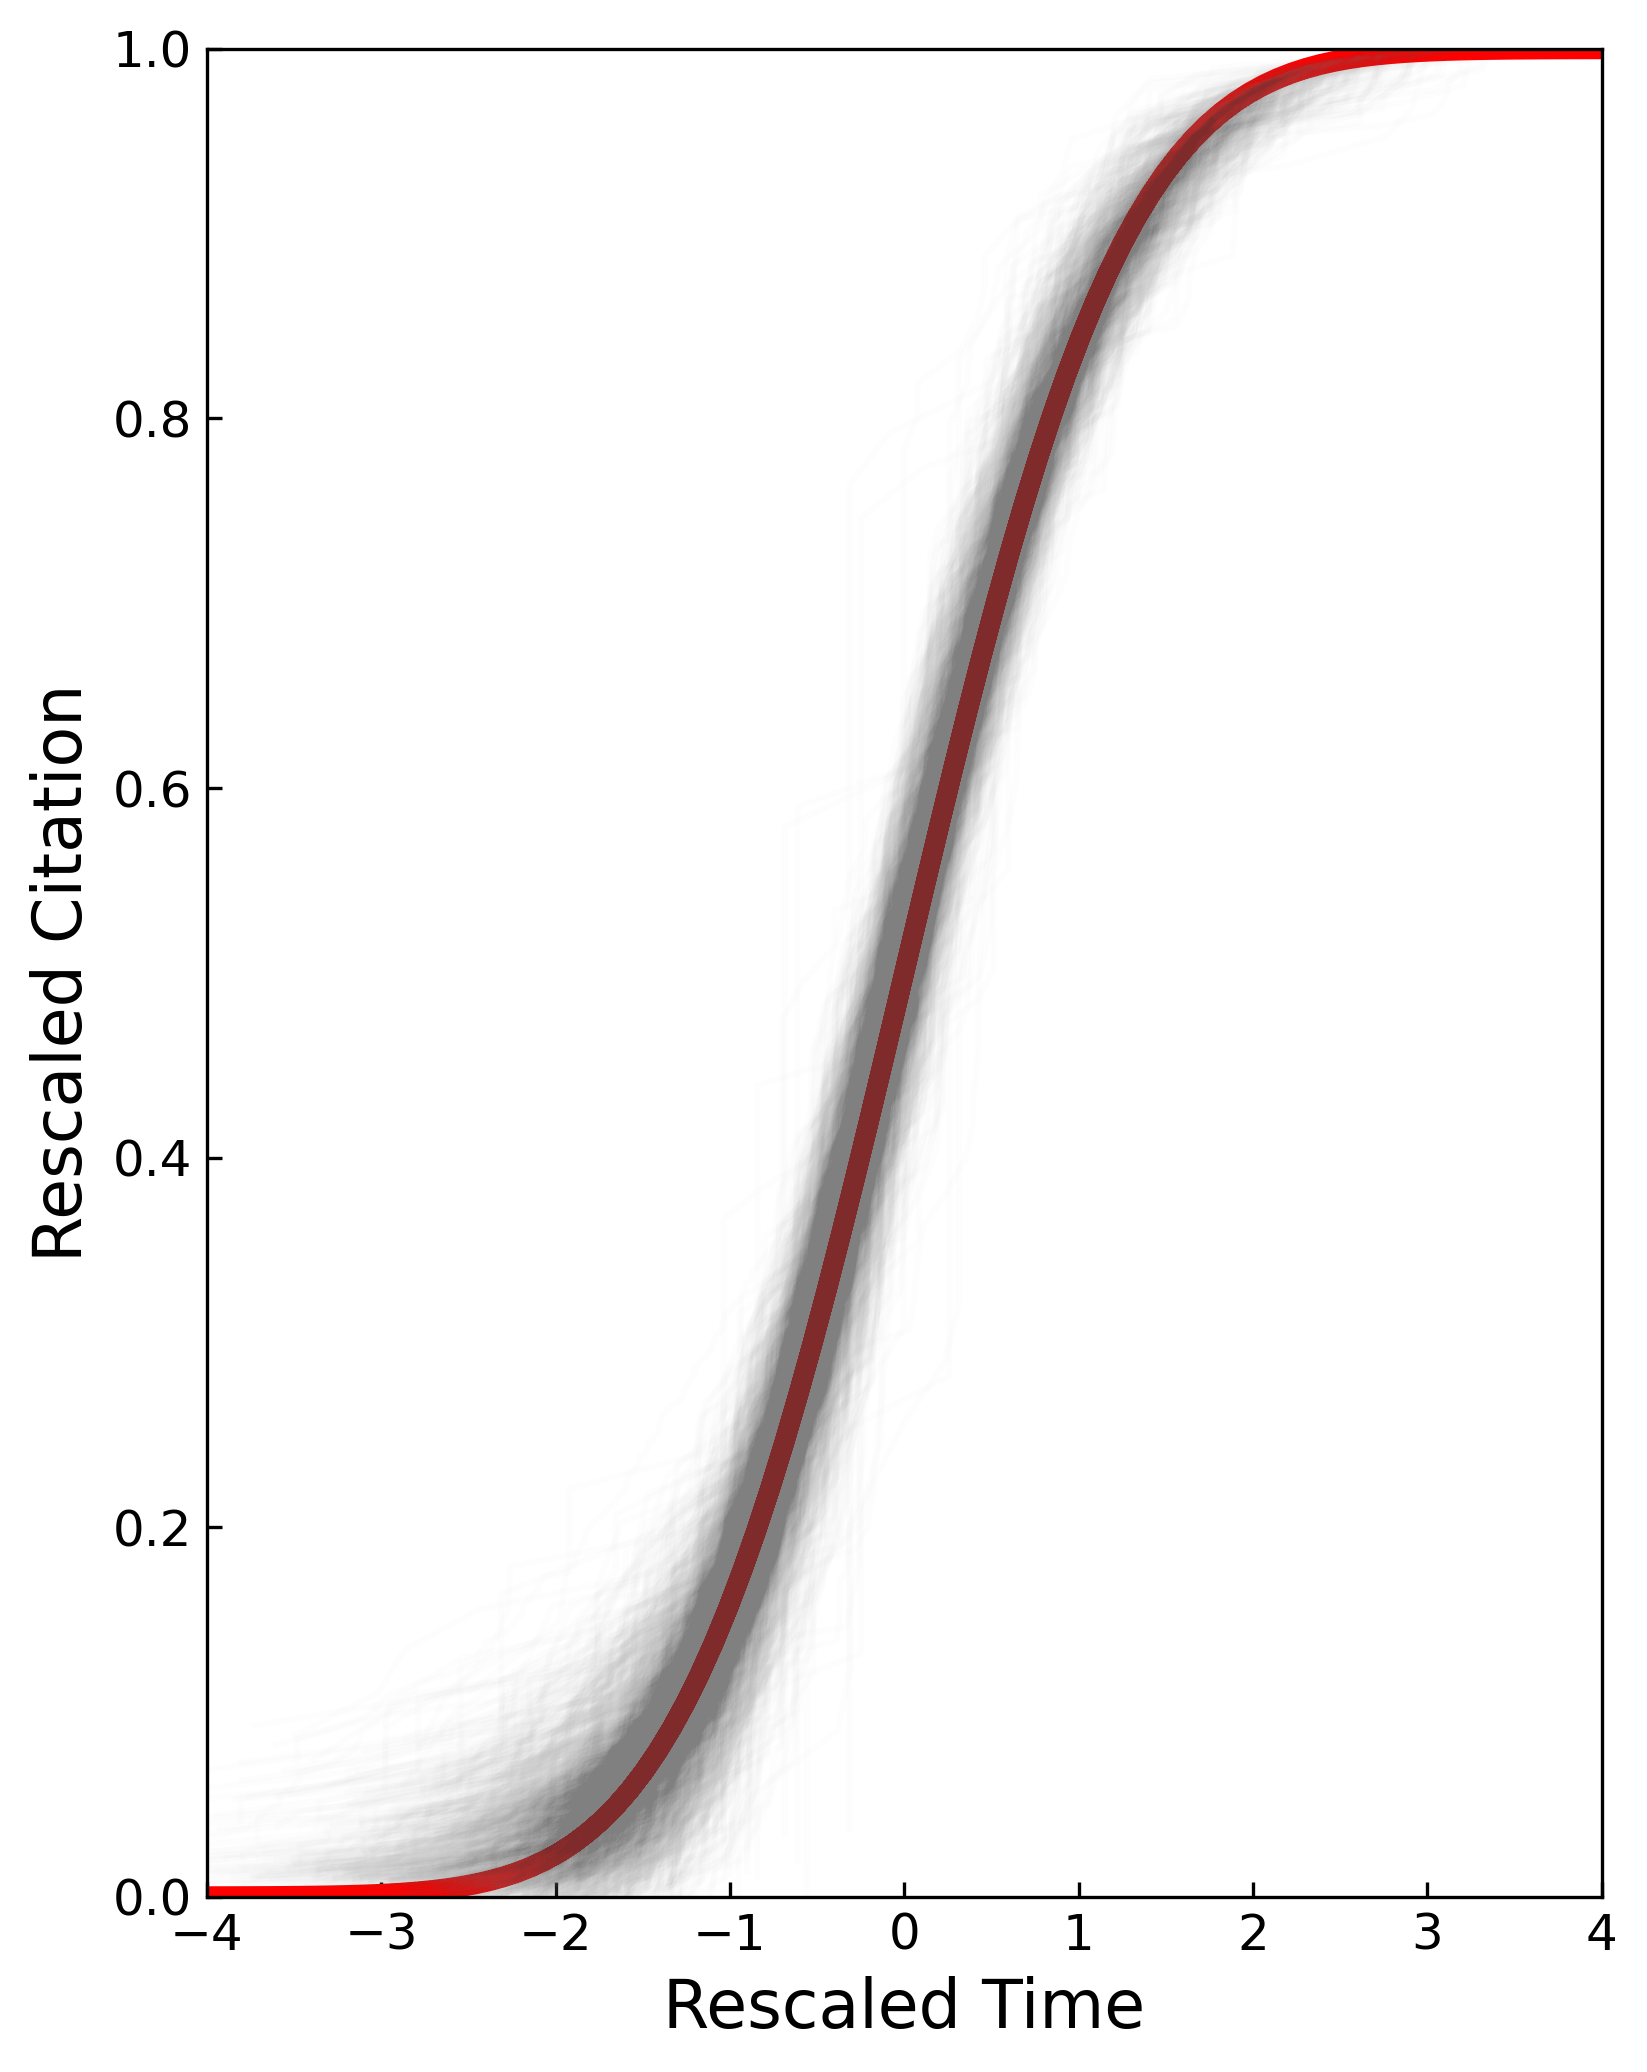

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize = (6,8), dpi=300)

x = np.linspace(-4,4,100)
ax1.plot(x, norm.cdf(x), 'r', linewidth=5)

cnt = 0
cur = 0
for paper in tqdm(PaperNode_List):
    cite_a = np.array([Paper_Citations_Dict[paper]])
    cite_a = cite_a[cite_a < m_T]
    n_d = len(cite_a)
#     if n_d < 15:
#         continue
    if n_d < 30:
        continue
    if cite_a[29] > 30 * 365:
        continue
    cnt += 1
    if cnt not in random_set:
        continue
    mu = Paper_Param_Dict[paper][0]
    sigma = Paper_Param_Dict[paper][1]
    
    X = CalculateX(cite_a, mu, sigma, n_d)
    
    T_tilde_list = []
    Phi_tilde_list = []
    
    cur_T = cite_a[-1]
    
    for i,t in enumerate(cite_a):
        c_t = i + 1
        
        A = CalculateA(c_t, n_d)
#         B = np.log(Beta + X)
        
        phi_tilde = (Beta + X) * (1.0 - 1.0/(np.e**A)) + Phi(cur_T, mu, sigma)
        t_tilde = (np.log(t) - mu) / sigma
        if t_tilde > 4:
            break
        T_tilde_list.append(t_tilde)
        Phi_tilde_list.append(phi_tilde)
    if cnt in random_set:
        ax1.plot(T_tilde_list, Phi_tilde_list, 'gray', alpha=0.01)
#     if cnt > 100:
#         break
ax1.set_xlim(-4, 4)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel('Rescaled Time',size=16)
ax1.set_ylabel('Rescaled Citation',size=16)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')

# ax1.xaxis.set_minor_locator(ticker.IndexLocator(base=2.5, offset=-1))
# ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='x', which='minor', direction='in', length=2)
ax1.tick_params(axis='y', which='minor', direction='in', length=2)

print(cnt, cur)

100%|██████████| 36802/36802 [00:34<00:00, 1054.86it/s]


16342 0


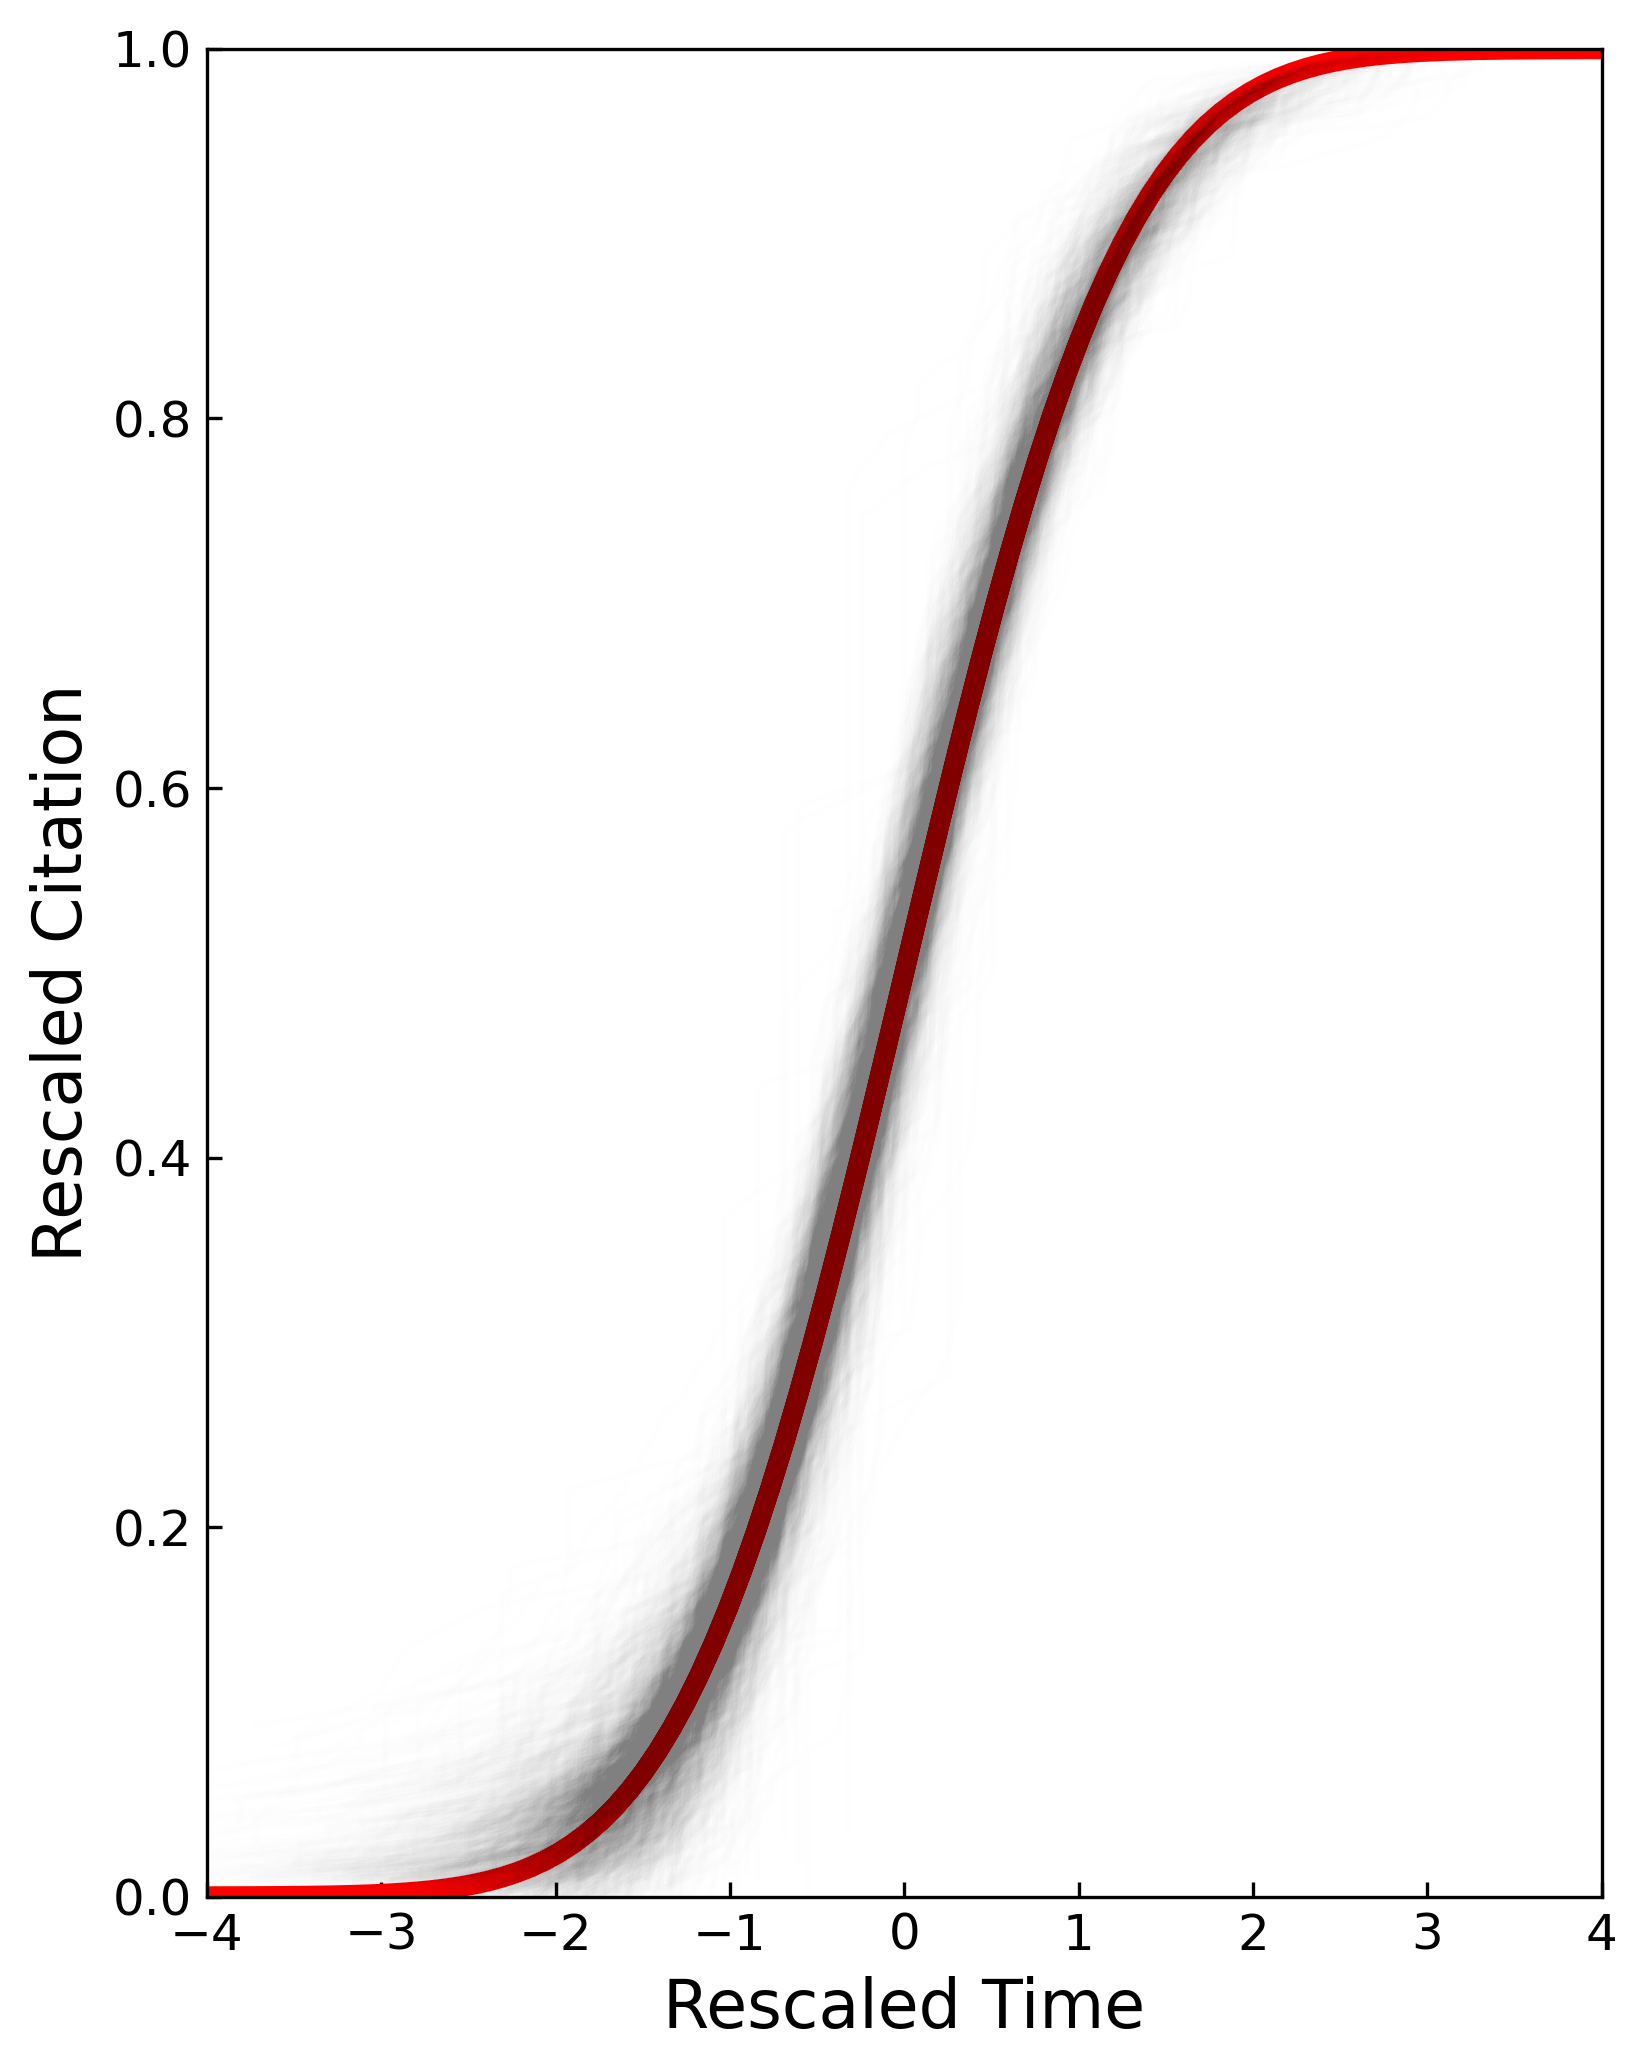

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize = (6,8), dpi=300)

x = np.linspace(-4,4,100)
ax1.plot(x, norm.cdf(x), 'r', linewidth=5)

cnt = 0
cur = 0
for paper in tqdm(PaperNode_List):
    cite_a = np.array([Paper_Citations_Dict[paper]])
    cite_a = cite_a[cite_a < m_T]
    n_d = len(cite_a)
#     if n_d < 15:
#         continue
    if n_d < 30:
        continue
    if cite_a[29] > 30 * 365:
        continue
    cnt += 1
    if cnt not in random_set:
        continue
    mu = Paper_Param_Dict[paper][0]
    sigma = Paper_Param_Dict[paper][1]
    
    X = CalculateX(cite_a, mu, sigma, n_d)
    
    T_tilde_list = []
    Phi_tilde_list = []
    
    cur_T = cite_a[-1]
    
    for i,t in enumerate(cite_a):
        c_t = i + 1
        
        A = CalculateA(c_t, n_d)
#         B = np.log(Beta + X)
        
        phi_tilde = (Beta + X) * (1.0 - 1.0/(np.e**A)) + Phi(cur_T, mu, sigma)
        t_tilde = (np.log(t) - mu) / sigma
        if t_tilde > 4:
            break
        T_tilde_list.append(t_tilde)
        Phi_tilde_list.append(phi_tilde)
    if cnt in random_set:
        ax1.plot(T_tilde_list, Phi_tilde_list, 'gray', alpha=0.002)
#     if cnt > 100:
#         break
ax1.set_xlim(-4, 4)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel('Rescaled Time',size=16)
ax1.set_ylabel('Rescaled Citation',size=16)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')

# ax1.xaxis.set_minor_locator(ticker.IndexLocator(base=2.5, offset=-1))
# ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='x', which='minor', direction='in', length=2)
ax1.tick_params(axis='y', which='minor', direction='in', length=2)

print(cnt, cur)

In [31]:
random.seed(10)
random_list = random.sample(range(n), int(1000*(36802/16342)) + 100)
random_set = set(random_list)

In [32]:
len(random_list)

2351

100%|██████████| 36802/36802 [00:15<00:00, 2424.69it/s]


16342 0 1000


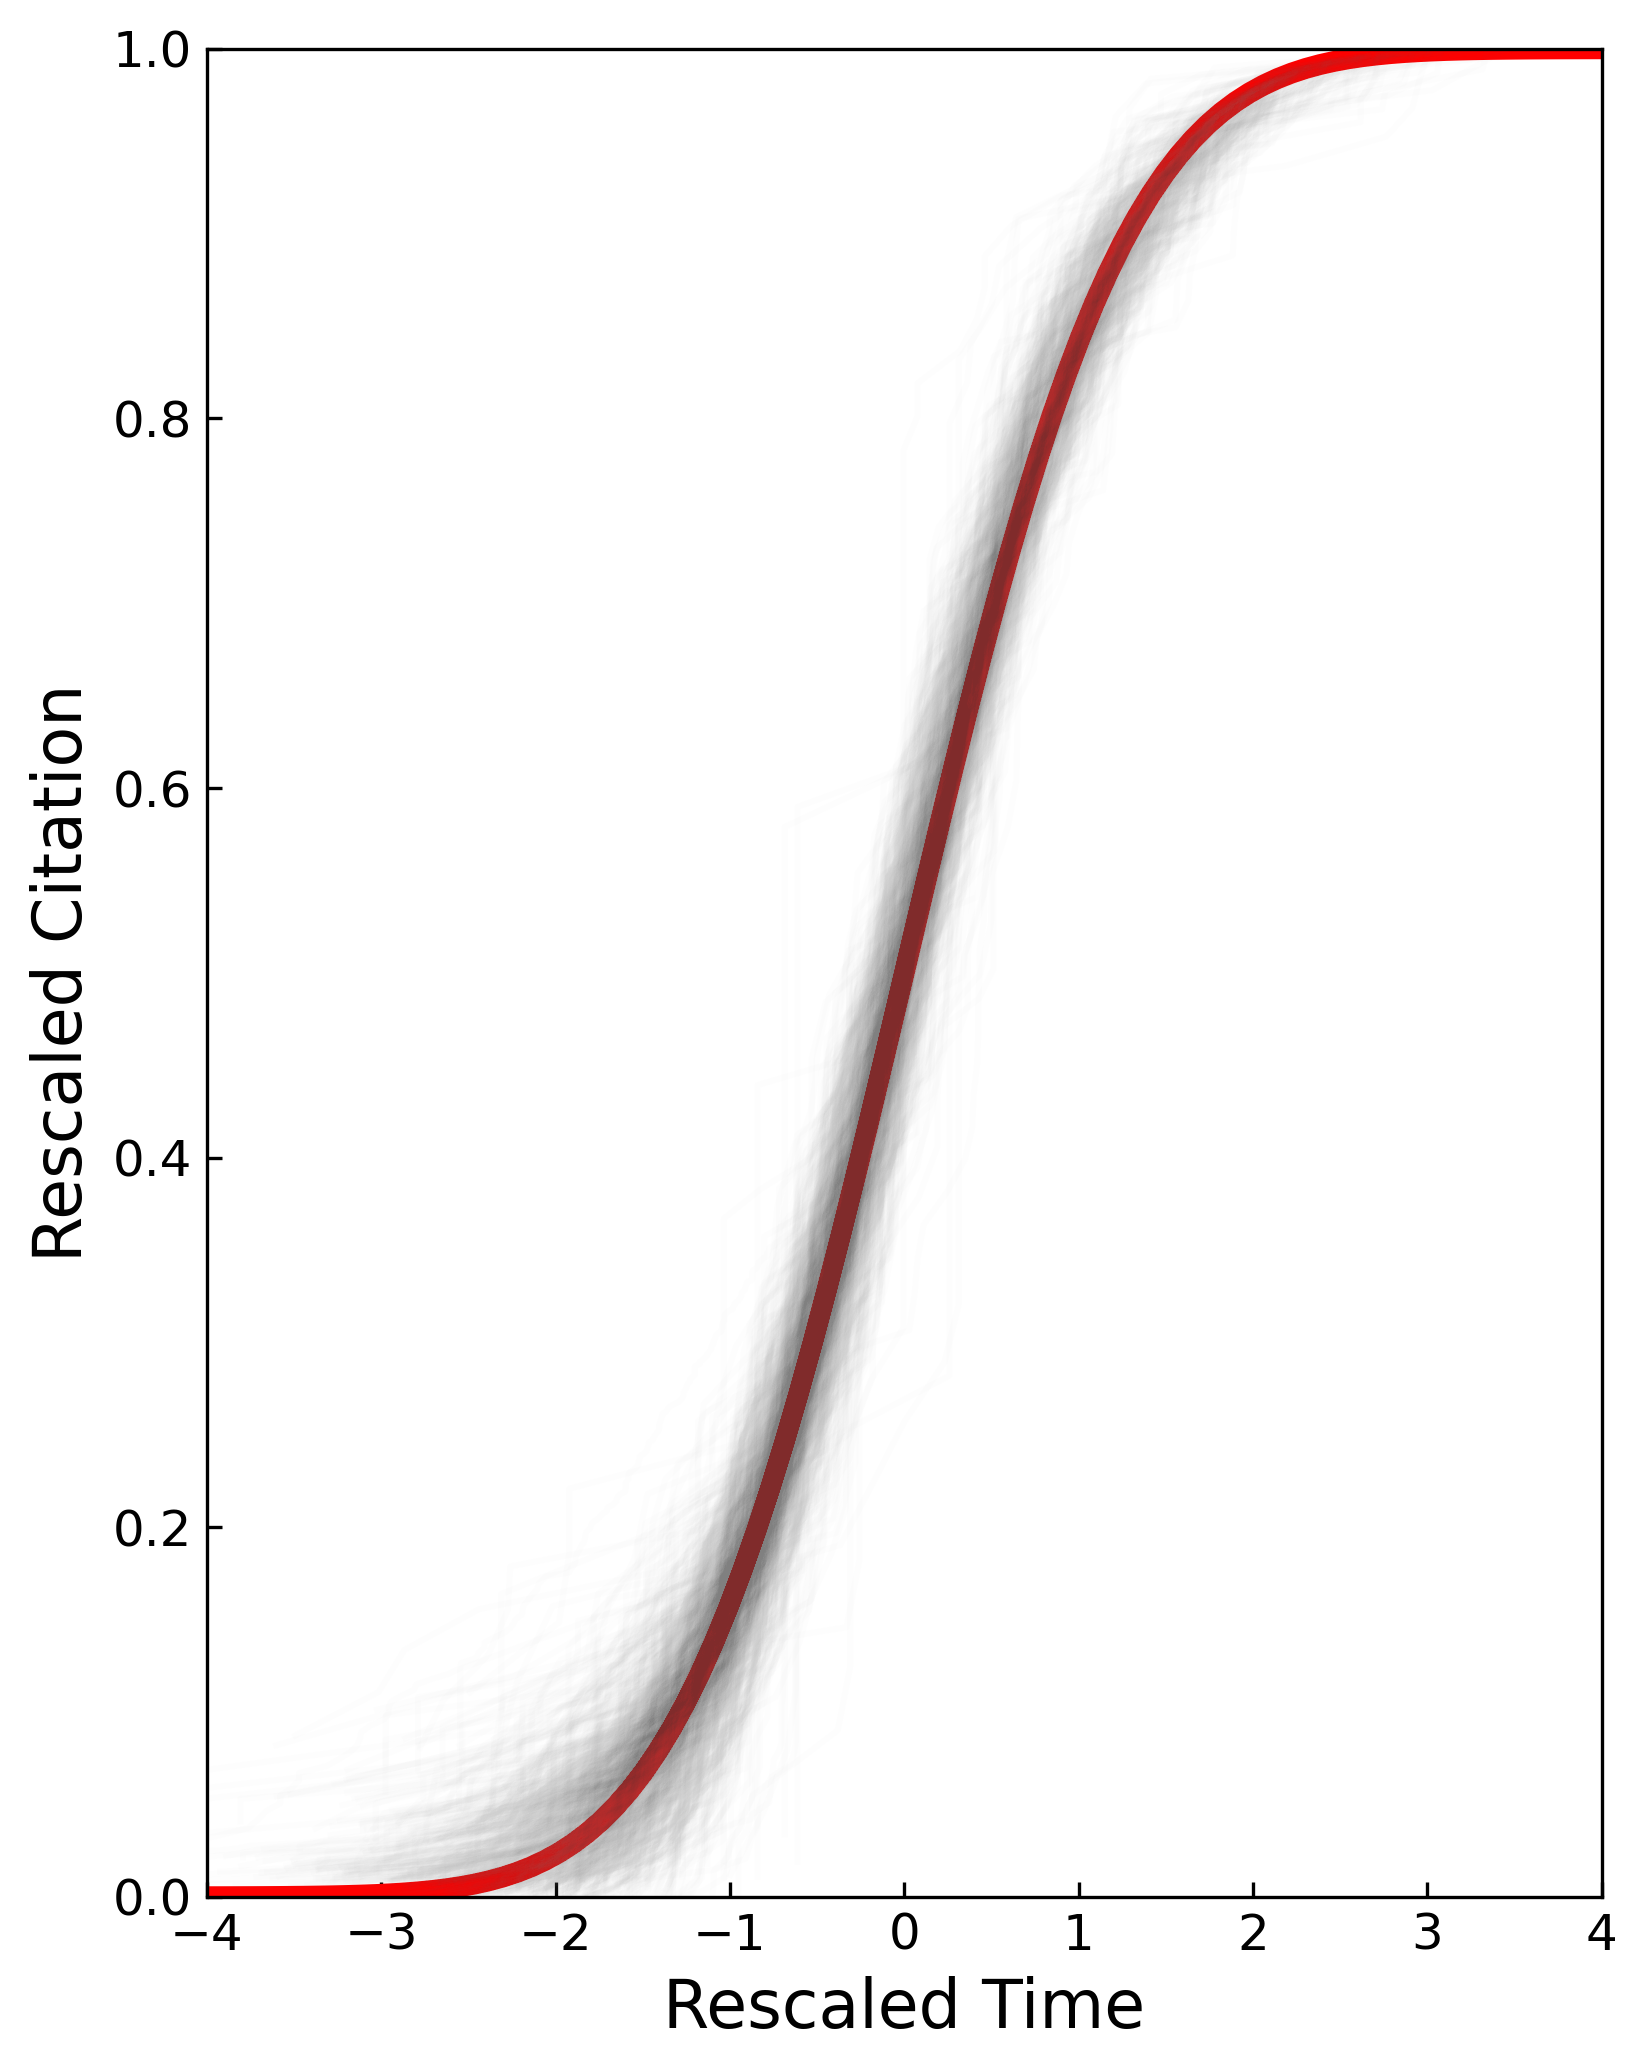

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize = (6,8), dpi=300)

x = np.linspace(-4,4,100)
ax1.plot(x, norm.cdf(x), 'r', linewidth=5)

cnt = 0
cur = 0
plot_cnt = 0
for paper in tqdm(PaperNode_List):
    cite_a = np.array([Paper_Citations_Dict[paper]])
    cite_a = cite_a[cite_a < m_T]
    n_d = len(cite_a)
#     if n_d < 15:
#         continue
    if n_d < 30:
        continue
    if cite_a[29] > 30 * 365:
        continue
    cnt += 1
    
    if cnt not in random_set:
        continue
    if plot_cnt >= 1000:
        continue
    mu = Paper_Param_Dict[paper][0]
    sigma = Paper_Param_Dict[paper][1]
    
    X = CalculateX(cite_a, mu, sigma, n_d)
    
    T_tilde_list = []
    Phi_tilde_list = []
    
    cur_T = cite_a[-1]
    
    for i,t in enumerate(cite_a):
        c_t = i + 1
        
        A = CalculateA(c_t, n_d)
#         B = np.log(Beta + X)
        
        phi_tilde = (Beta + X) * (1.0 - 1.0/(np.e**A)) + Phi(cur_T, mu, sigma)
        t_tilde = (np.log(t) - mu) / sigma
        if t_tilde > 4:
            break
        T_tilde_list.append(t_tilde)
        Phi_tilde_list.append(phi_tilde)
    if cnt in random_set:
        if plot_cnt >= 1000:
            continue
        plot_cnt += 1
        ax1.plot(T_tilde_list, Phi_tilde_list, 'gray', alpha=0.01)
#     if cnt > 100:
#         break
ax1.set_xlim(-4, 4)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel('Rescaled Time',size=16)
ax1.set_ylabel('Rescaled Citation',size=16)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')

# ax1.xaxis.set_minor_locator(ticker.IndexLocator(base=2.5, offset=-1))
# ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='x', which='minor', direction='in', length=2)
ax1.tick_params(axis='y', which='minor', direction='in', length=2)

print(cnt, cur, plot_cnt)

In [34]:
fig.savefig('./Validation-Figures/WSB_Universality_1960s_Final.pdf', bbox_inches="tight")

In [24]:
# random.seed(10)
# random_list = random.sample(range(12024), 4000)
# random_set = set(random_list)